NAME: __________________        CLASS: __________________     DATE: __________________

# Planets

© Dimitrios Theodorakis GNU General Public License v3.0 
https://github.com/DimitriosAstro/Astronomy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import Image
%matplotlib inline

### AIM - Analyse data on planets and exoplanets, make predictions from our plots, visualise Kepler data
Difficulty: Easy

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) Are the densities of the rocky planets similar?  
2) Why are Jupiter, Saturn, Uranus, and Neptune split into two groups?  
3) Do you think it's easier for Kepler to detect Earth or Jupiter size exoplanets?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Mass vs Distance Plot](#MassvsDistancePlot)
* [Radius vs Distance Plot](#RadiusvsDistancePlot)
* [Density vs Distance Plot](#DensityvsDistancePlot)
* [Density vs Radius Plot](#DensityvsRadiusPlot)
* [Radius vs Distance with Exoplanets Plot](#RadiusExovsDistancePlot)
* [Mass vs Distance with Exoplanets Plot](#MassExovsDistancePlot)
* [Question Answers](#Answers)
* [Challenges](#Challenges)
* [References](#References)


# Let's go: Plotting planetary data <a class="anchor" id="Start"></a>

The file **planets.csv** has some basic data about the planets, Pluto, the Galilean Moons, and Charon. Let's load it and print some of the data:

In [2]:
file = 'planets.csv'
df = pd.read_csv(file)

print(df.head())
print(df.columns)

    planet moon   mass  diameter  density  gravity  escape_velocity  \
0  Mercury    n  0.330    4879.0     5427      3.7              4.3   
1    Venus    n  4.870   12104.0     5243      8.9             10.4   
2    Earth    n  5.970   12756.0     5514      9.8             11.2   
3     Moon    y  0.073    3475.0     3340      1.6              2.4   
4     Mars    n  0.642    6792.0     3933      3.7              5.0   

   rotation_period  length_day  avg_dist  ...      T     v    i      e  \
0           1407.6      4222.6    57.900  ...   88.0  47.4  7.0  0.205   
1          -5832.5      2802.0   108.200  ...  224.7  35.0  3.4  0.007   
2             23.9        24.0   149.600  ...  365.2  29.8  0.0  0.017   
3            655.7       708.7     0.384  ...   27.3   1.0  5.1  0.055   
4             24.6        24.7   227.900  ...  687.0  24.1  1.9  0.094   

         o   Temp       P  num_moons  rings  mag_field  
0    0.034  167.0   0.000        0.0      n          y  
1  177.400  46

The ```df.columns``` code returned the header values. You can see we have data such as temperature, diameter, mass, and whether the planet/moon has a magnetic field! (Some data is missing for the moons in the file)

Let's make some plots. Complete the code block below to make a plot of the mass vs distance from the sun for the eight planets: <a class="anchor" id="MassvsDistancePlot"></a>

C:\Users\polyq\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


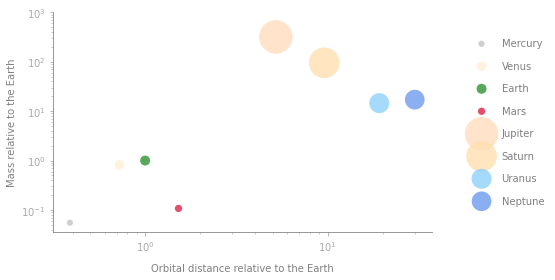

In [3]:
AU = 1.495978707*10**11

# The planet name!
names = df['planet'].values
# is it a moon? 'y' or 'n'
moon = df['moon'].values
# colors for plotting the planets
colors = ['silver', 'papayawhip', 'forestgreen', 'dimgrey', 'crimson', 'peachpuff', 'navajowhite', 'lightskyblue', 'cornflowerblue', 'slategrey', 'khaki', 'lightcyan', 'burlywood', 'lemonchiffon', 'darkslategrey']
# scale the marker sizes based on the diameter of the planet 
sizes = df['diameter'].values/12756*100

# set up a new figure and axis
fig = plt.figure(num=1, figsize=(8, 4))
ax = plt.subplot(111)

# get the mass values and divide them by the value for the Earth
mass = df['mass'].values/5.97
# get the avg_dist and convert to AU 
# note the distances are stored as 10**6 km so convert to m first then to AU
avg_dist = df['avg_dist'].values*10**9/AU

# for each planet plot it
# do not plot moons or Pluto!
for i in range(len(names)):
    if (moon[i] == 'n') and (names[i] != 'Pluto'):
        ax.scatter(avg_dist[i], mass[i], color=colors[i], label=names[i], sizes=[sizes[i]], alpha=0.75, ec='None')

# set the scale of both axes to be log
ax.set_yscale('log')
ax.set_xscale('log')

# give your plot axis labels
ax.set_xlabel('Orbital distance relative to the Earth', labelpad=10, color='grey')
ax.set_ylabel('Mass relative to the Earth', color='grey')

# tidying up the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 1000)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='both', which='both', colors='darkgrey')

# sorting out the legend
leg = ax.legend(frameon=False, loc='center', bbox_to_anchor=(1.2, 0.5), handletextpad=1, labelspacing=1.25)
plt.setp(leg.get_texts(), color='grey')
plt.tight_layout()

Use your plot to answer the following Q's. Answers are in their own section before the Challenges.

1) What trends are there in the mass vs distance figure?  
2) Which planet is similar to the Earth?  

**Enter your answers:**    
1)    
2)

Once you've taken some time to answer those questions we're going to make two more plots. One of the radius of the planet vs the average distance and one of the density vs radius of the planet. Complete the two code blocks below to make the plots and again attempt the questions that follow them. <a class="anchor" id="RadiusvsDistancePlot"></a>

C:\Users\polyq\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


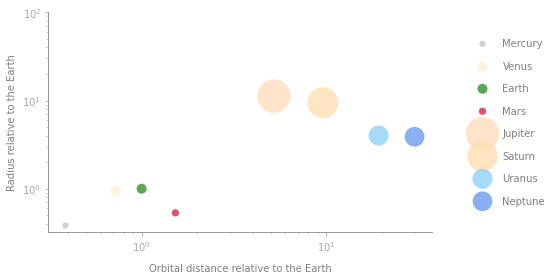

In [4]:
# setup a new figure and axis instance
fig = plt.figure(num=2, figsize=(8, 4))
ax = plt.subplot(111)

# get the radii and scale to Earths radius
# remember the csv contains diamters not radii
radii = df['diameter'].values/2/(12756/2)

# for each planet plot a scatter point
for i in range(len(names)):
    # don't plot moons or Pluto
    if (moon[i] == 'n') and (names[i] != 'Pluto'):
        ax.scatter(avg_dist[i], radii[i], color=colors[i], label=names[i], sizes=[sizes[i]], alpha=0.75, ec='None')

ax.set_yscale('log')
ax.set_xscale('log')

# set the right and top spine to not be visible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(0, 100)
ax.set_xlabel('Orbital distance relative to the Earth', labelpad=10, color='grey')
ax.set_ylabel('Radius relative to the Earth', color='grey', labelpad=5)

# set the colors and ticks on the graph like before
# use different colors this time
# extra: make the minor and major ticks differnet colors
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='both', which='both', colors='darkgrey')

# sort out the legend
leg = ax.legend(frameon=False, loc='center', bbox_to_anchor=(1.2, 0.5), handletextpad=1, labelspacing=1.25)
plt.setp(leg.get_texts(), color='grey')
plt.tight_layout()

**Questions:**

3) Are the planets grouped similarly to the last plot of mass vs average distance?  

<a class="anchor" id="DensityvsDistancePlot"></a>

**Enter your answers:**    
3)    

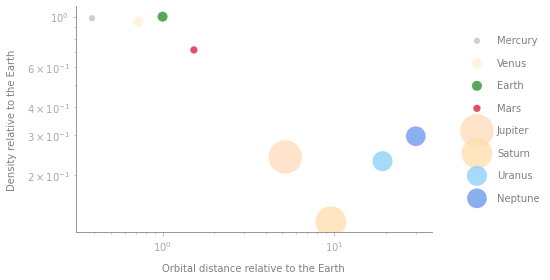

In [5]:
# create a new figure instance
fig = plt.figure(num=3, figsize=(8, 4))
ax = plt.subplot(111)

# scale the density to that of the Earth
density = df['density'].values/5514

# plot the points
for i in range(len(names)):
    if (moon[i] == 'n') and (names[i] != 'Pluto'):
        ax.scatter(avg_dist[i], density[i], color=colors[i], label=names[i], sizes=[sizes[i]], alpha=0.75, ec='None')

# tidy up the axes and create the legend
ax.set_yscale('log')
ax.set_xscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Orbital distance relative to the Earth', labelpad=10, color='grey')
ax.set_ylabel('Density relative to the Earth', color='grey', labelpad=10)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='both', which='both', colors='darkgrey')

leg = ax.legend(frameon=False, loc='center', bbox_to_anchor=(1.2, 0.5), handletextpad=1, labelspacing=1.25)
plt.setp(leg.get_texts(), color='grey')
plt.tight_layout()

**Questions:**

4) Why are the density of the gas gaints lower?  
5) Why is the density of Saturn lower than Jupiter?  

**Enter your answers:**    
4)    
5)

Load the next few plots which have been pre-prepared for you. The first is a plot of density vs radius for the eight planets. The second and third are plots of radius vs distance and mass vs distance respectively but with Kepler exoplanet data included!

<a class="anchor" id="DensityvsRadiusPlot"></a>

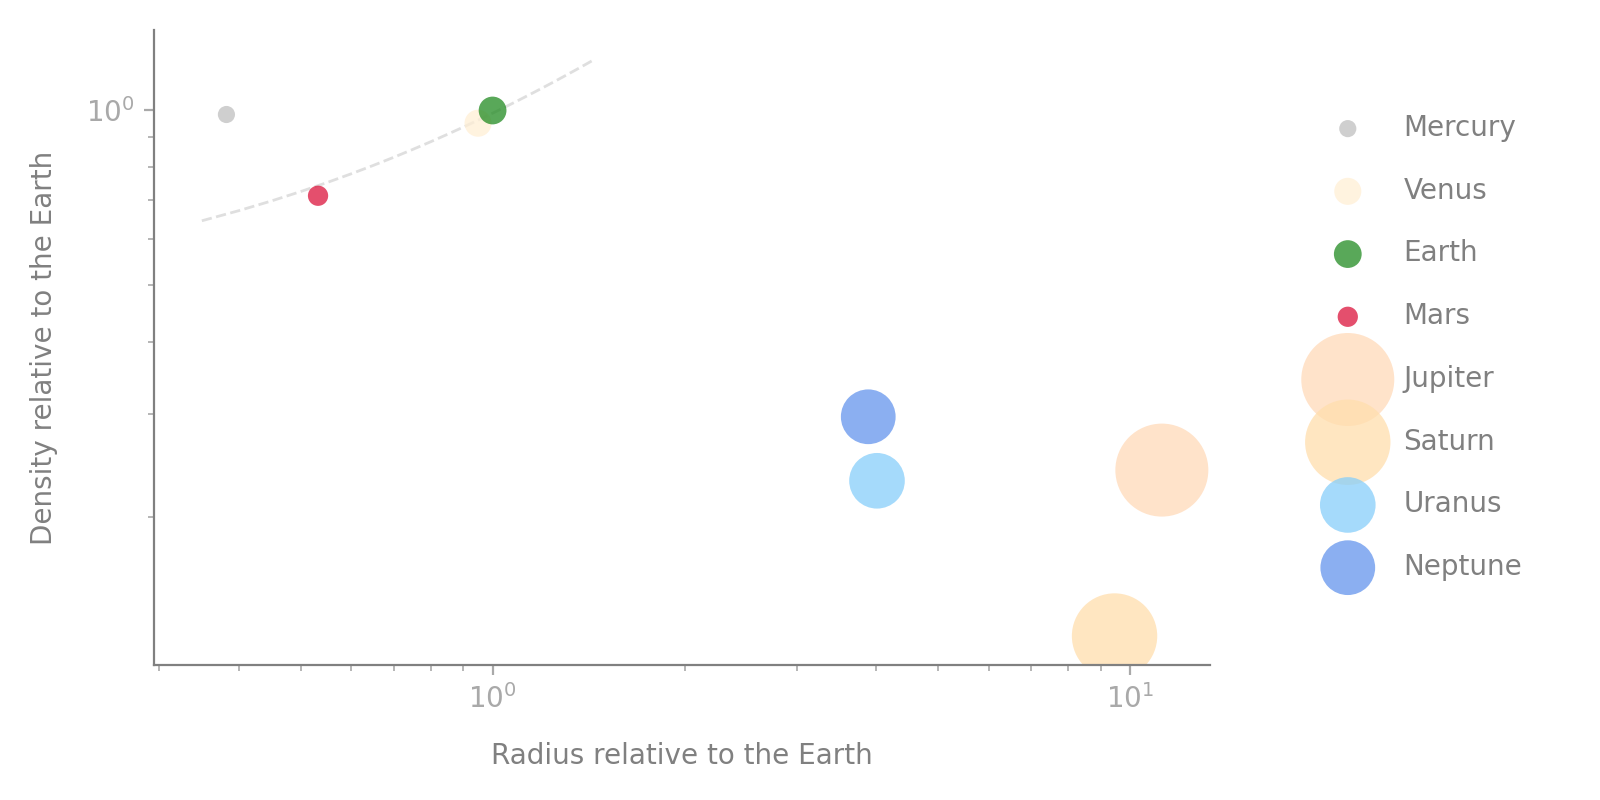

In [6]:
Image('density_vs_radius_planets.png')

**Questions:**

6) Does Mercury look out of place in this plot?  
7) What do you think the dashed line is?

<a class="anchor" id="RadiusExovsDistancePlot"></a>

**Enter your answers:**    
6)    
7)

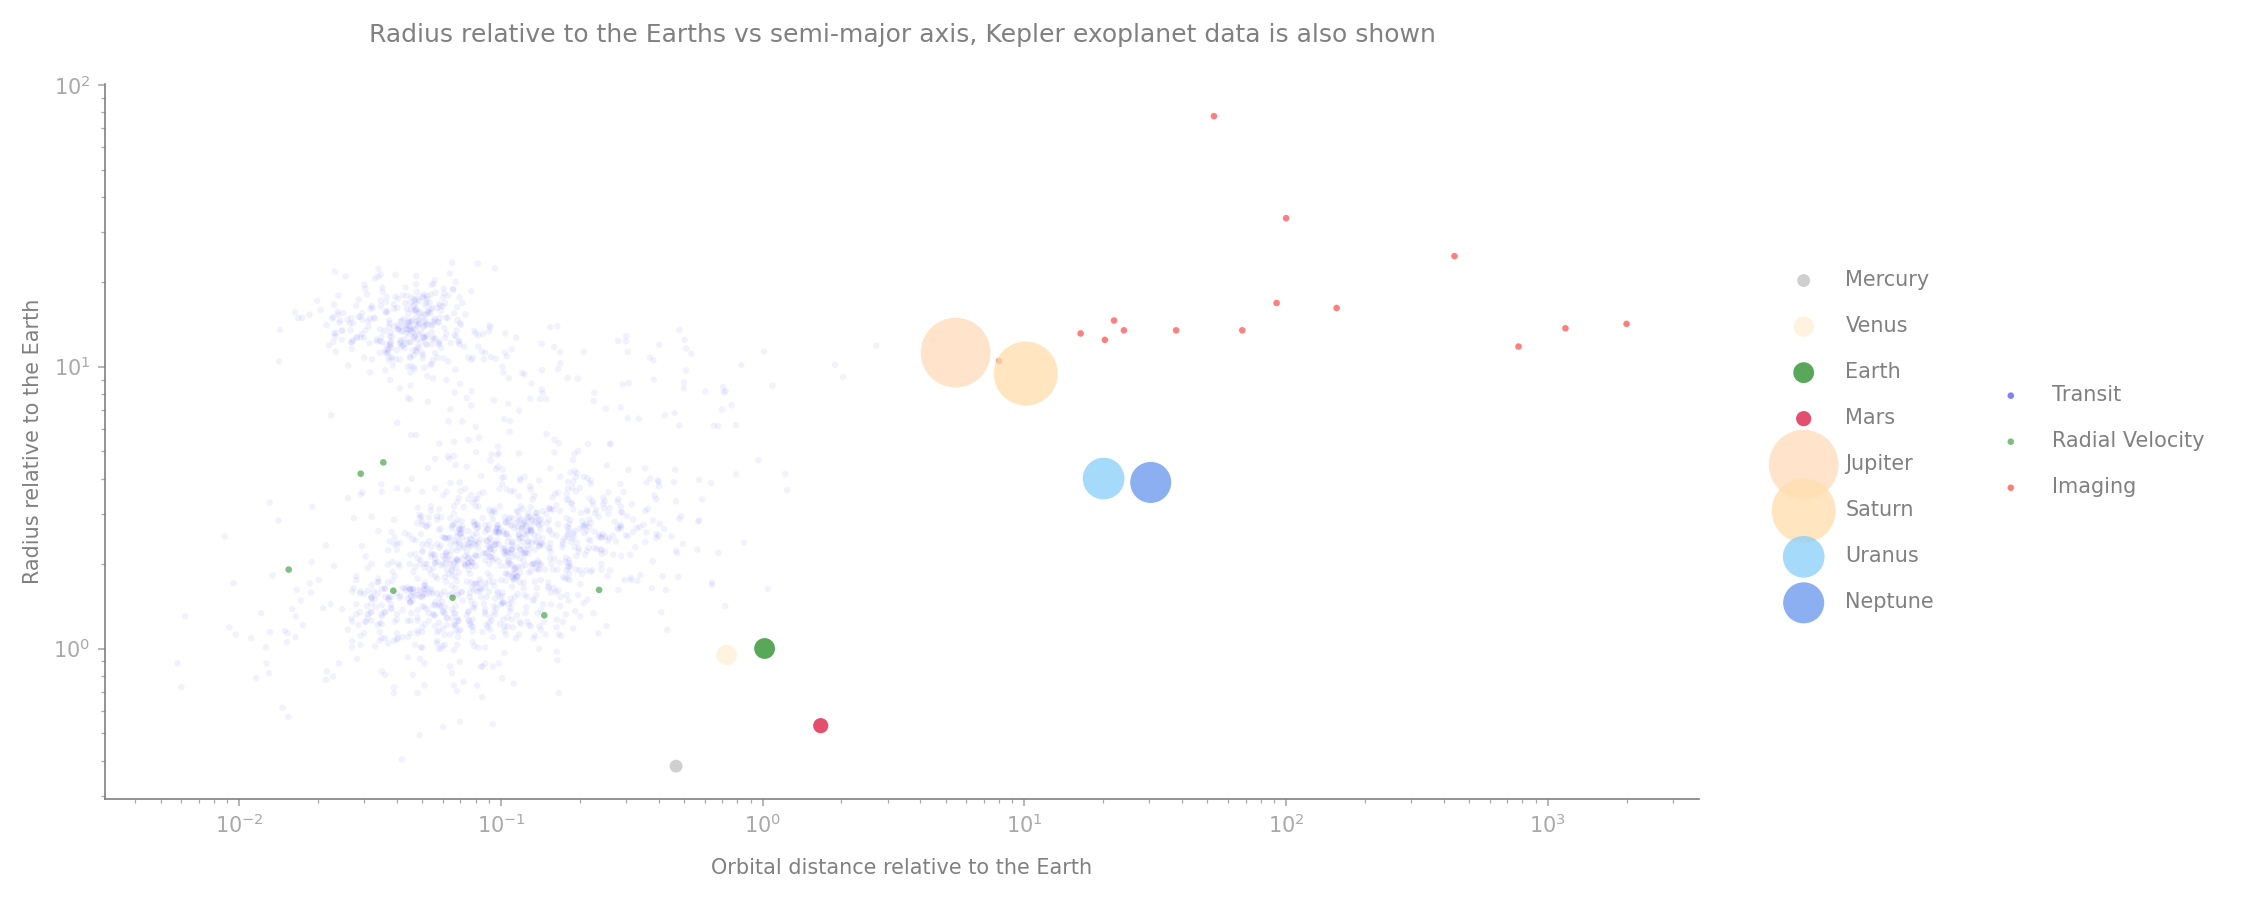

In [7]:
Image('radius_vs_distance_exoplanets.png')

**Questions:**
    
8) What differences are there between the exoplanets detected by Kepler using the 'Transit' vs the 'Imaging' method?

<a class="anchor" id="MassExovsDistancePlot"></a>

**Enter your answers:**    
8)    

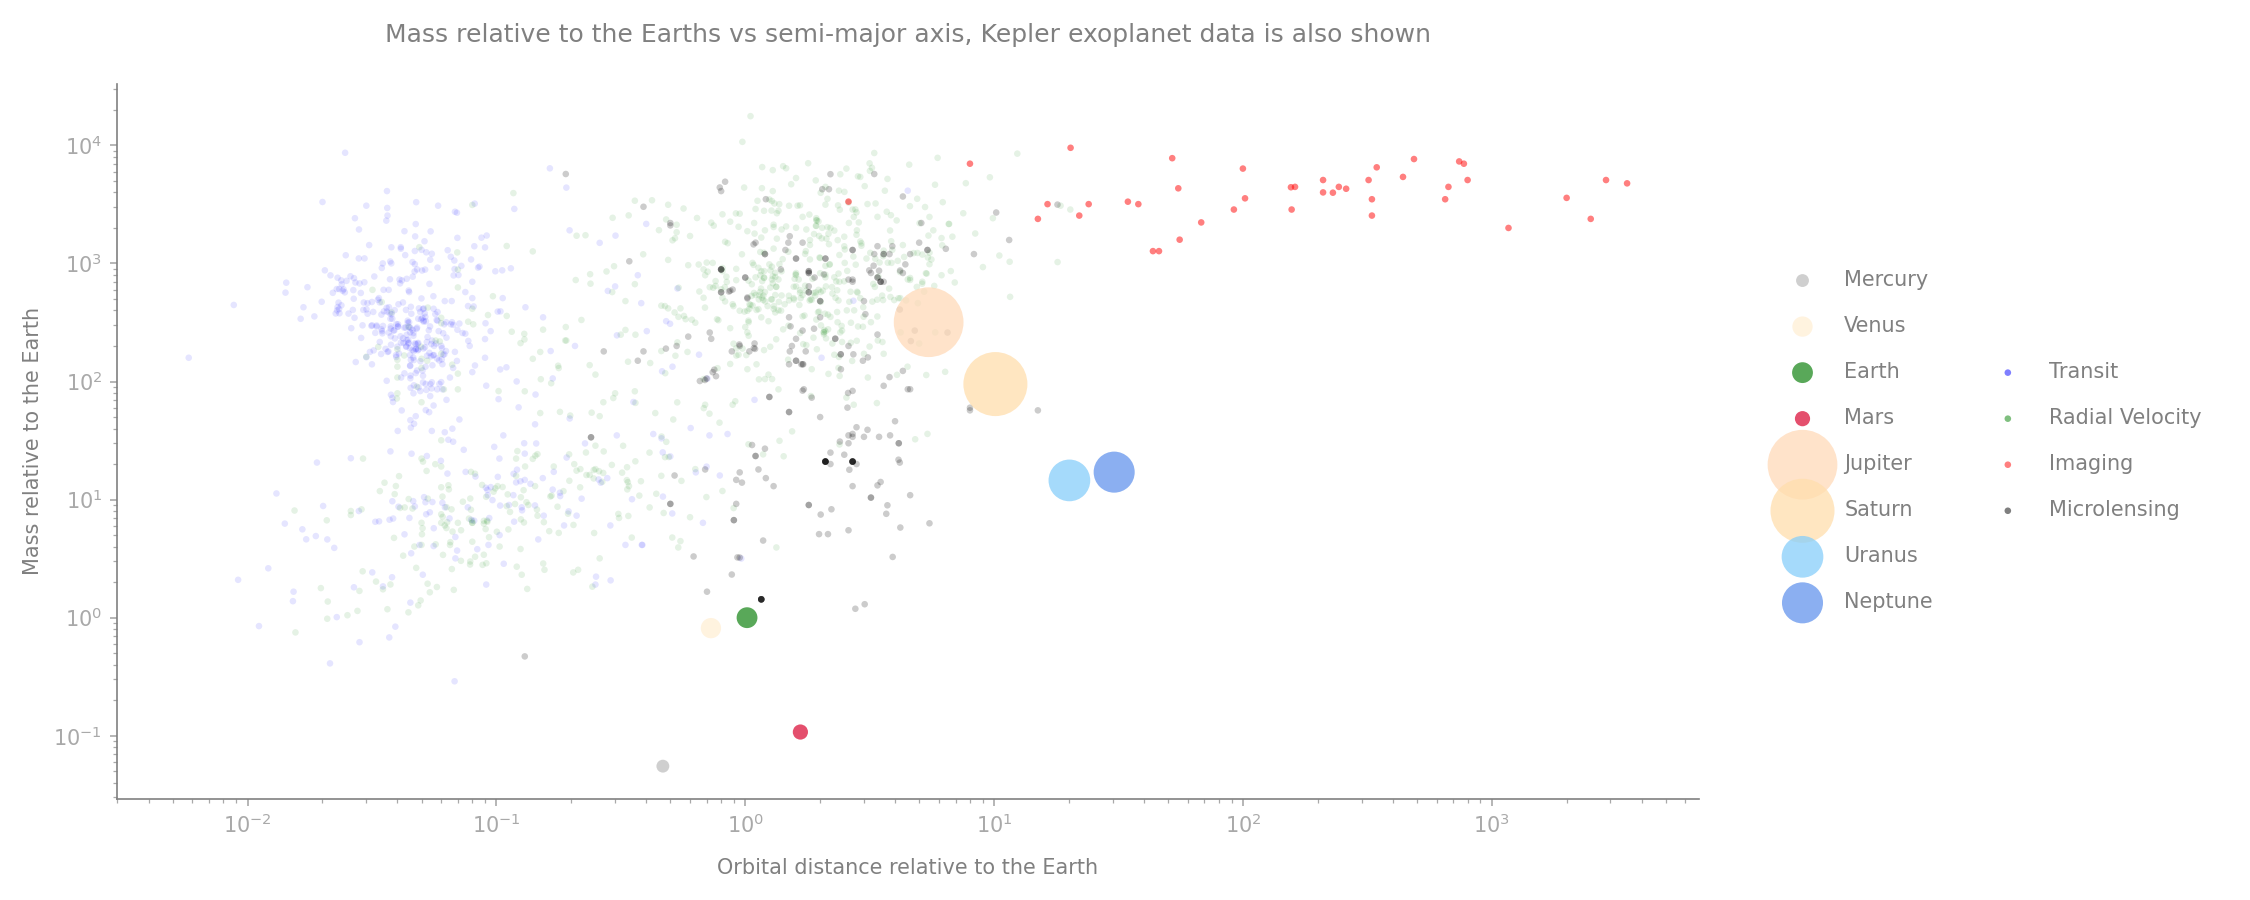

In [8]:
Image('mass_vs_distance_exoplanets.png')

**Questions:**

9) Again what differences are there between the exoplanets found by the four different methods?  
10) Are we finding many Earh-like exoplanets?

**Enter your answers:**    
9)    
10)

The **exoplanets.csv** and **exoplanets_microlensing.csv** files contain the data used to plot the last two figures. There are other methods for detecting exoplanets which I have not plotted. You might like to delve into the csvs later and make new plots showing data I omitted.

## Answers <a class="anchor" id="Answers"></a>

**1) What trends are there in the mass vs distance figure?**  

There are two distinct groups, one for the rocky planets and one for the gas giants. The mass of a planet in general increases with distance from the sun.

**2) Which planet is similar to the Earth?**  

Venus is the most similar having roughly the same mass and radius (it's a bit smaller).

**3) Are the planets grouped similarly to the last plot of mass vs average distance?** 

Yes! Radius and Mass are related via density which is plotted in the third to last figure. Within the two planetary groups the densities are similar.

**4) Why are the density of the gas gaints lower?**  

The gas giants are made up of mainly gases (hydrogen and helium) where the rocky planets are mainly made from rocks/silicate material with heavy iron cores.

**5) Why is the density of Saturn lower than Jupiter?**  

Jupiter is bigger and hence it has a stronger gravitational field to compact the material it's made from so it has a higher density. You will see in the Planetary Interiors notebook that Jupiter has a much larger layer of highly compressed 'metallic' hydrogen inside.

**6) Does Mercury look out of place in this plot?** 

Yes it does not follow the same trendline as the other rocky planets.

**7) What do you think the dashed line is?**

This trendline is for planets that are like Earth, Mars, and Venus which have similar interiors and compositions. You will see why Mercury deviates from this line in the Planetary Interiors notebook when you plot the size of its layers against the other rocky planets.

**8) What differences are there between the exoplanets detected by Kepler using the 'Transit' vs the 'Imaging' method?**

Detecting exoplanets is hard! The imaging method is where we have directly photographed the exoplanet. This favours very high mass Jupiter like planets which are far away from the host star. The transit method, where a dip in the light recieved by the host star is detected when the planet passes across the face of the star, favours larger and heavier planets which are very close to the host star. These are observational biases. It does not mean there are few Earth sized planets at roughly the same distance from their host star as the Earth, just that our current methods are biased towards finding much bigger planets.

**9) Again what differences are there between the exoplanets found by the four different methods?**  

The different methods are biased towards different sizes and masses of exoplanets at different distances. 

**10) Are we finding many Earth-like exoplanets?**

It looks like we know of a few exoplanets of a similar radius to the Earth but most have a higher mass and/or are much closer to their host star than the Earth is to the sun.

# Challenge <a class="anchor" id="Challenges"></a>

1) Recreate any of the last three plots.  
2) Make similar plots but for the moons in the data file or include Pluto and see where it fits in.  
3) There are more exoplanet detection methods in the Kepler data files. Make plots of the exoplanets discovered with them and note what sort of planet they are biased towards finding (large Jupiter like, far from the host or perhaps very close - a so called hot Jupiter).

# References <a class="anchor" id="References"></a>

Cynthia Phillips - Planets and Satellites activities [https://www.noao.edu/jagi/sepo/education/plansat/ssgraph1.html](https://www.noao.edu/jagi/sepo/education/plansat/ssgraph1.html)  
Cynthia Phillips - Solar System Parameters [https://www.noao.edu/jagi/sepo/education/plansat/table.html](https://www.noao.edu/jagi/sepo/education/plansat/table.html)  
David R. Williams - NASA Planetary Factsheet [https://nssdc.gsfc.nasa.gov/planetary/factsheet/](https://nssdc.gsfc.nasa.gov/planetary/factsheet/)  
NASA Exoplanet archive, IPAC/Caltech [here - https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html](https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html)